In [1]:
import numpy as np
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
import scanpy as sc
import scipy

In [2]:
sc.settings.verbosity = 3 

In [3]:
adata_raw = ad.read_h5ad("/Users/apple/Desktop/KB/data/LarryData/larry_raw_w_clone_id.h5ad")

In [ ]:
len(adata_raw.obs["clone_id"].unique())

In [ ]:
adata_raw.obs['clone_id'].value_counts()

In [4]:
adata_raw = ad.read_h5ad("/Users/apple/Desktop/KB/data/LarryData/larry_raw_w_clone_id.h5ad")
value_counts = adata_raw.obs['clone_id'].value_counts()
frequency_dict = {}
for value, count in value_counts.items():
    if count in frequency_dict:
        frequency_dict[count].append(value)
    else:
        frequency_dict[count] = [value]



In [5]:
value_counts

clone_id
1261    177
2370    165
5714    142
292     134
5209    130
       ... 
5594      2
866       2
4884      2
5101      2
2251      2
Name: count, Length: 5864, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


# Set up the figure with higher DPI
plt.figure(figsize=(10, 6), dpi=300)

# Plot the histogram using Seaborn with better quality
sns.histplot(value_counts, bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of lineage size of Larry data', fontsize=16)
plt.xlabel('Number of Cells per Lineage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Save the figure with high quality if needed
plt.savefig("clone_id_value_counts_histogram.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# Set up the figure with higher DPI
plt.figure(figsize=(10, 6), dpi=300)

# Plot the histogram using Seaborn with log scale
sns.histplot(value_counts, bins=30, kde=False, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Histogram of lineage size of Larry data (Log Scale)', fontsize=16)
plt.xlabel('Number of Cells per Lineage', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Save the figure with high quality if needed
plt.savefig("clone_id_value_counts_histogram_log_scale.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [22]:
adata_hvgene.obs['Time point Day'] = "Day " + adata_hvgene.obs['Time point'].astype(str)


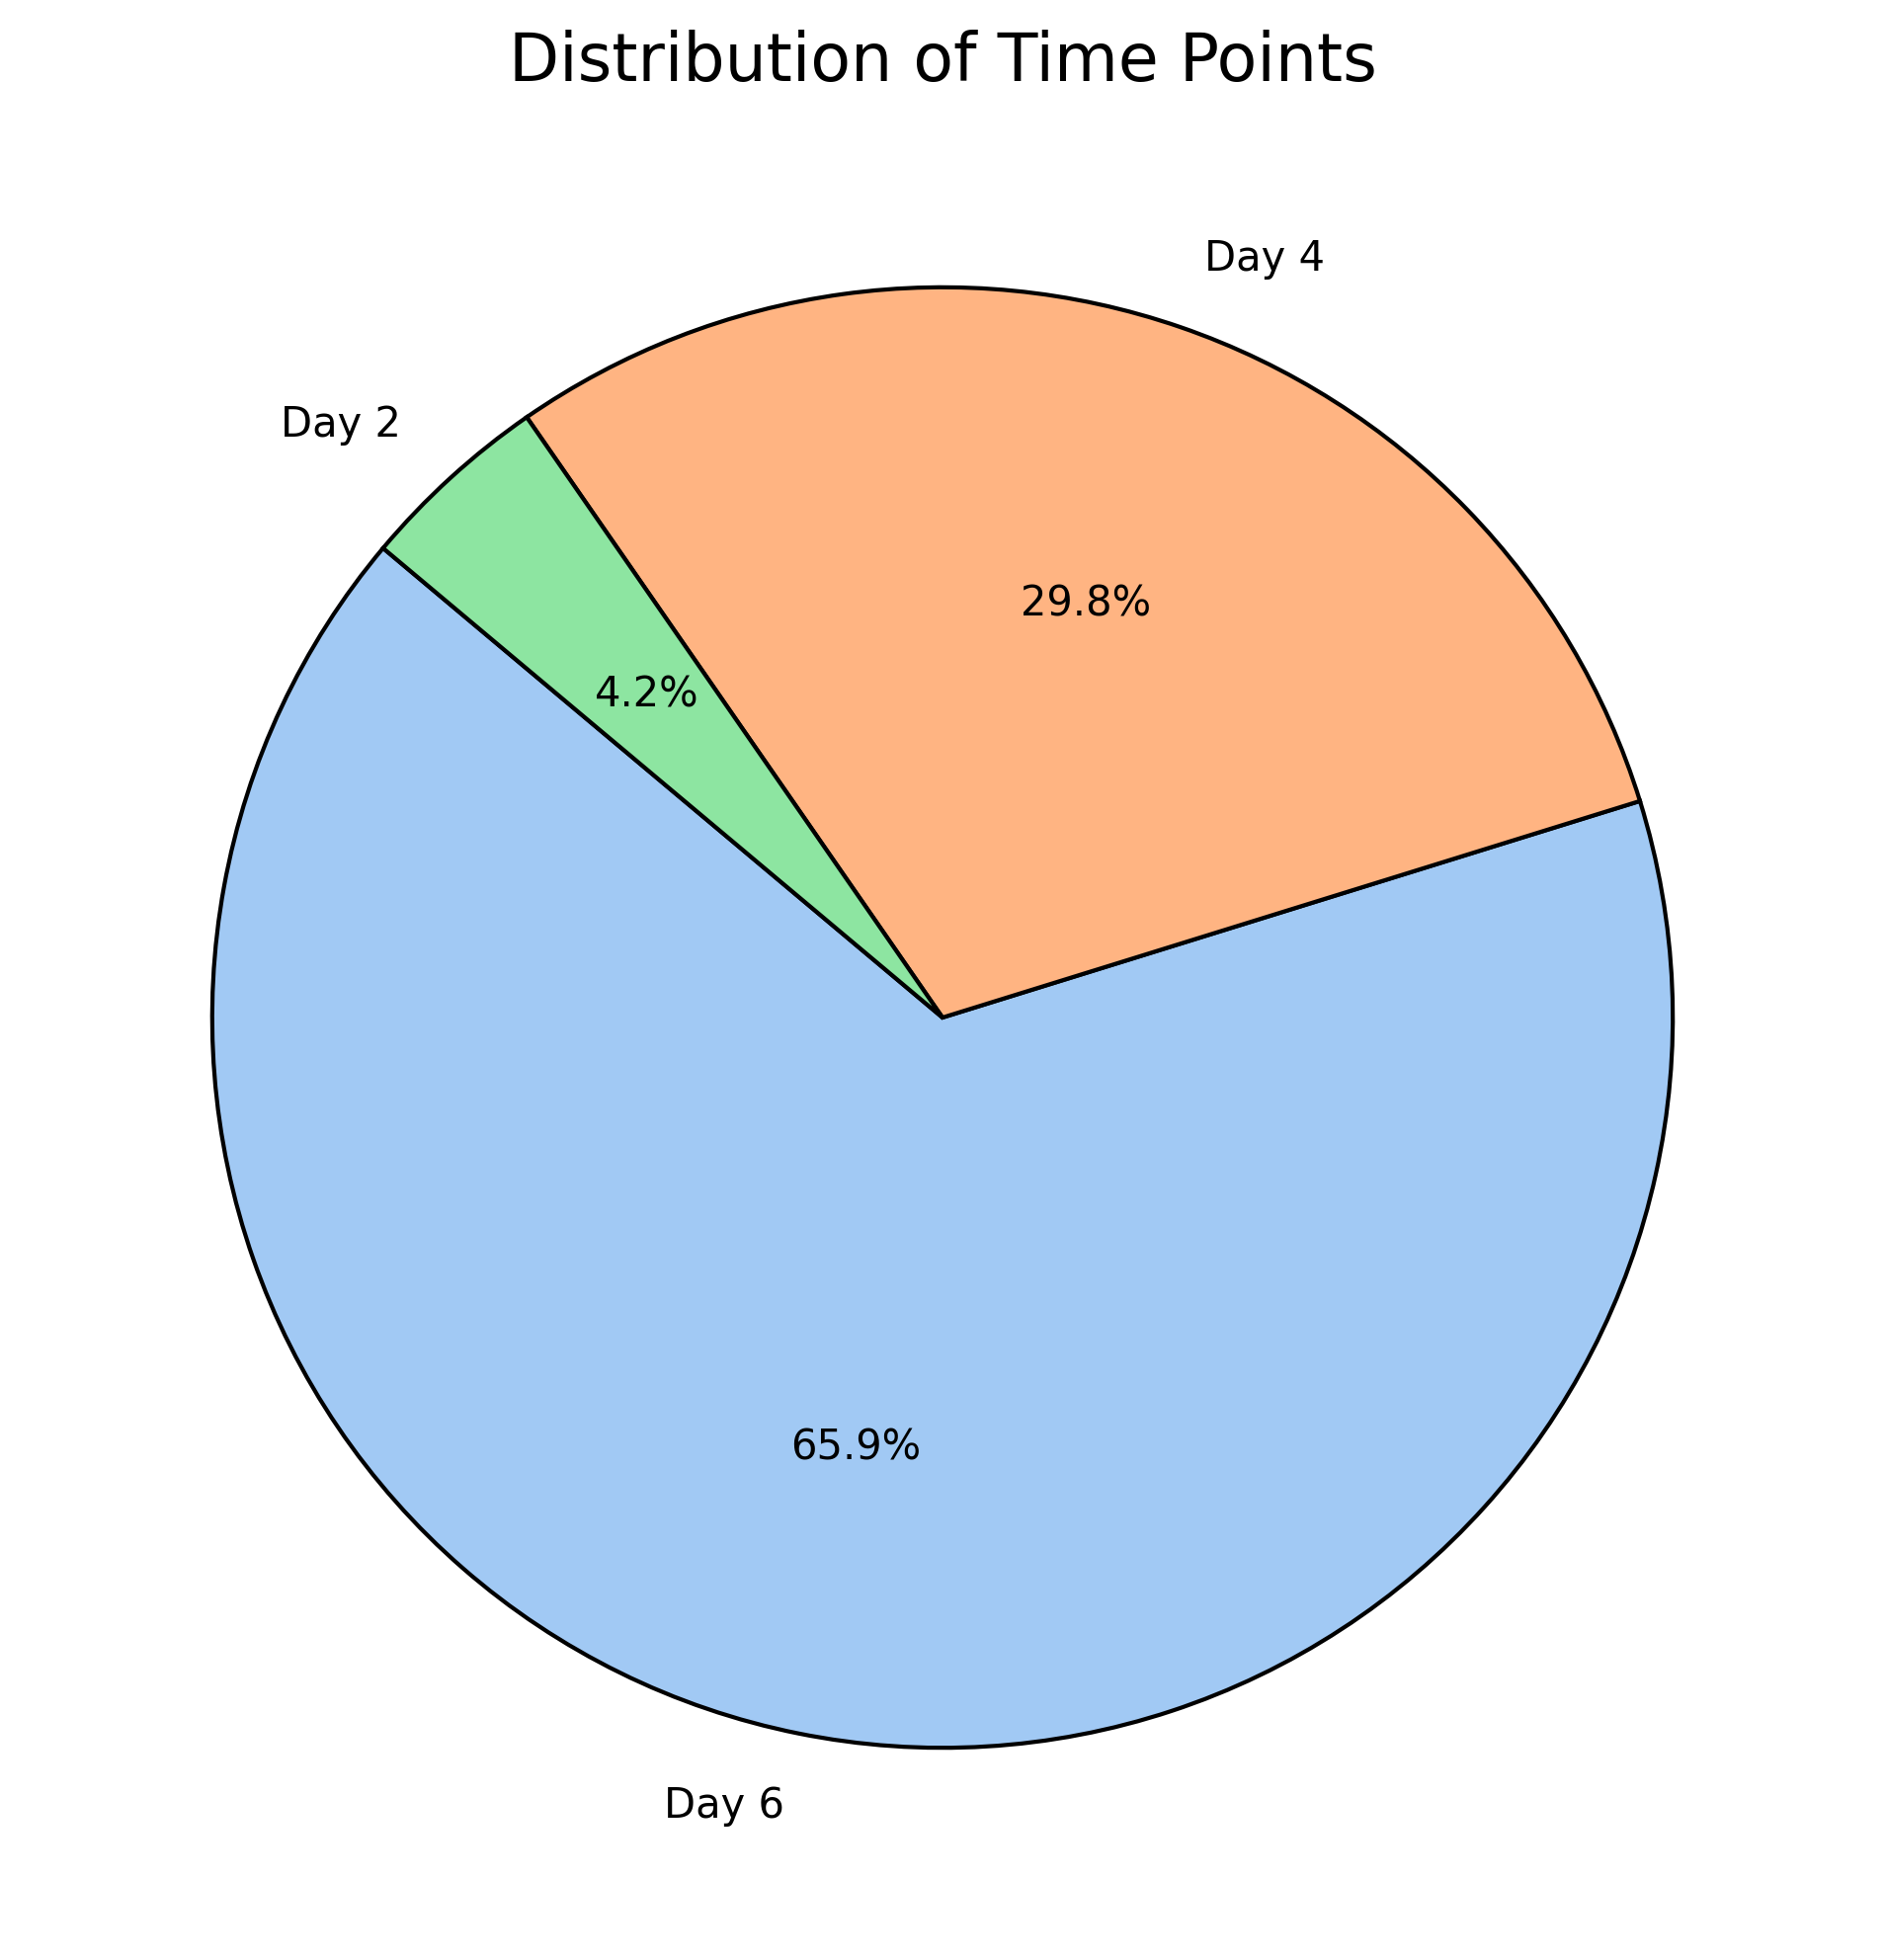

In [23]:
# Get the value counts of 'Time point'
time_point_counts = adata_hvgene.obs['Time point Day'].value_counts()

# Set up the figure with higher DPI and better quality
plt.figure(figsize=(8, 8), dpi=300)

# Use Seaborn color palette
colors = sns.color_palette("pastel", len(time_point_counts))

# Plot the pie chart
plt.pie(time_point_counts, labels=time_point_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.savefig("DistributionofTime.png", dpi=300, bbox_inches='tight')
plt.title('Distribution of Time Points', fontsize=16)
plt.show()


In [15]:
adata_raw.obs

,Library,Cell barcode,time_info,Starting population,state_info,Well,SPRING-x,SPRING-y,Time point,clone_id,Time point Day
d6_2_2:GCGTGCAAAGAAGTTA,d6_2_2,GCGTGCAA-AGAAGTTA,6.0,Lin-Kit+Sca1-,Undifferentiated,2,411.496,-96.190,6,573,Day 6
d6_2_2:AAGGGACCCTCGATGC,d6_2_2,AAGGGACC-CTCGATGC,6.0,Lin-Kit+Sca1-,Undifferentiated,2,-587.462,-306.925,6,1440,Day 6
d6_2_2:CGTACCGAAGCGCCTT,d6_2_2,CGTACCGA-AGCGCCTT,6.0,Lin-Kit+Sca1-,Monocyte,2,1429.805,-429.300,6,394,Day 6
d6_2_2:CCGTAGCTAGGCAGTT,d6_2_2,CCGTAGCT-AGGCAGTT,6.0,Lin-Kit+Sca1-,Undifferentiated,2,-1169.594,362.010,6,1972,Day 6
d6_2_2:TAGGCTTTCGTGGATA,d6_2_2,TAGGCTTT-CGTGGATA,6.0,Lin-Kit+Sca1-,Neutrophil,2,1236.039,-2113.013,6,1450,Day 6
...,...,...,...,...,...,...,...,...,...,...,...
LSK_d6_1_3:AGGCGTTTCCTATTCA,LSK_d6_1_3,AGGCGTTT-CCTATTCA,6.0,Lin-Kit+Sca1+,Undifferentiated,1,-1074.917,441.981,6,12,Day 6
LSK_d6_1_3:CGTGCAACTGGCCTGT,LSK_d6_1_3,CGTGCAAC-TGGCCTGT,6.0,Lin-Kit+Sca1+,Undifferentiated,1,247.634,281.262,6,267,Day 6
LSK_d6_1_3:CCCTTGCAAGTGAAAG,LSK_d6_1_3,CCCTTGCA-AGTGAAAG,6.0,Lin-Kit+Sca1+,Neutrophil,1,353.734,-980.246,6,3534,Day 6
LSK_d6_1_3:TCCGCTGTGACAGATA,LSK_d6_1_3,TCCGCTGT-GACAGATA,6.0,Lin-Kit+Sca1+,Monocyte,1,2513.013,-324.061,6,4945,Day 6


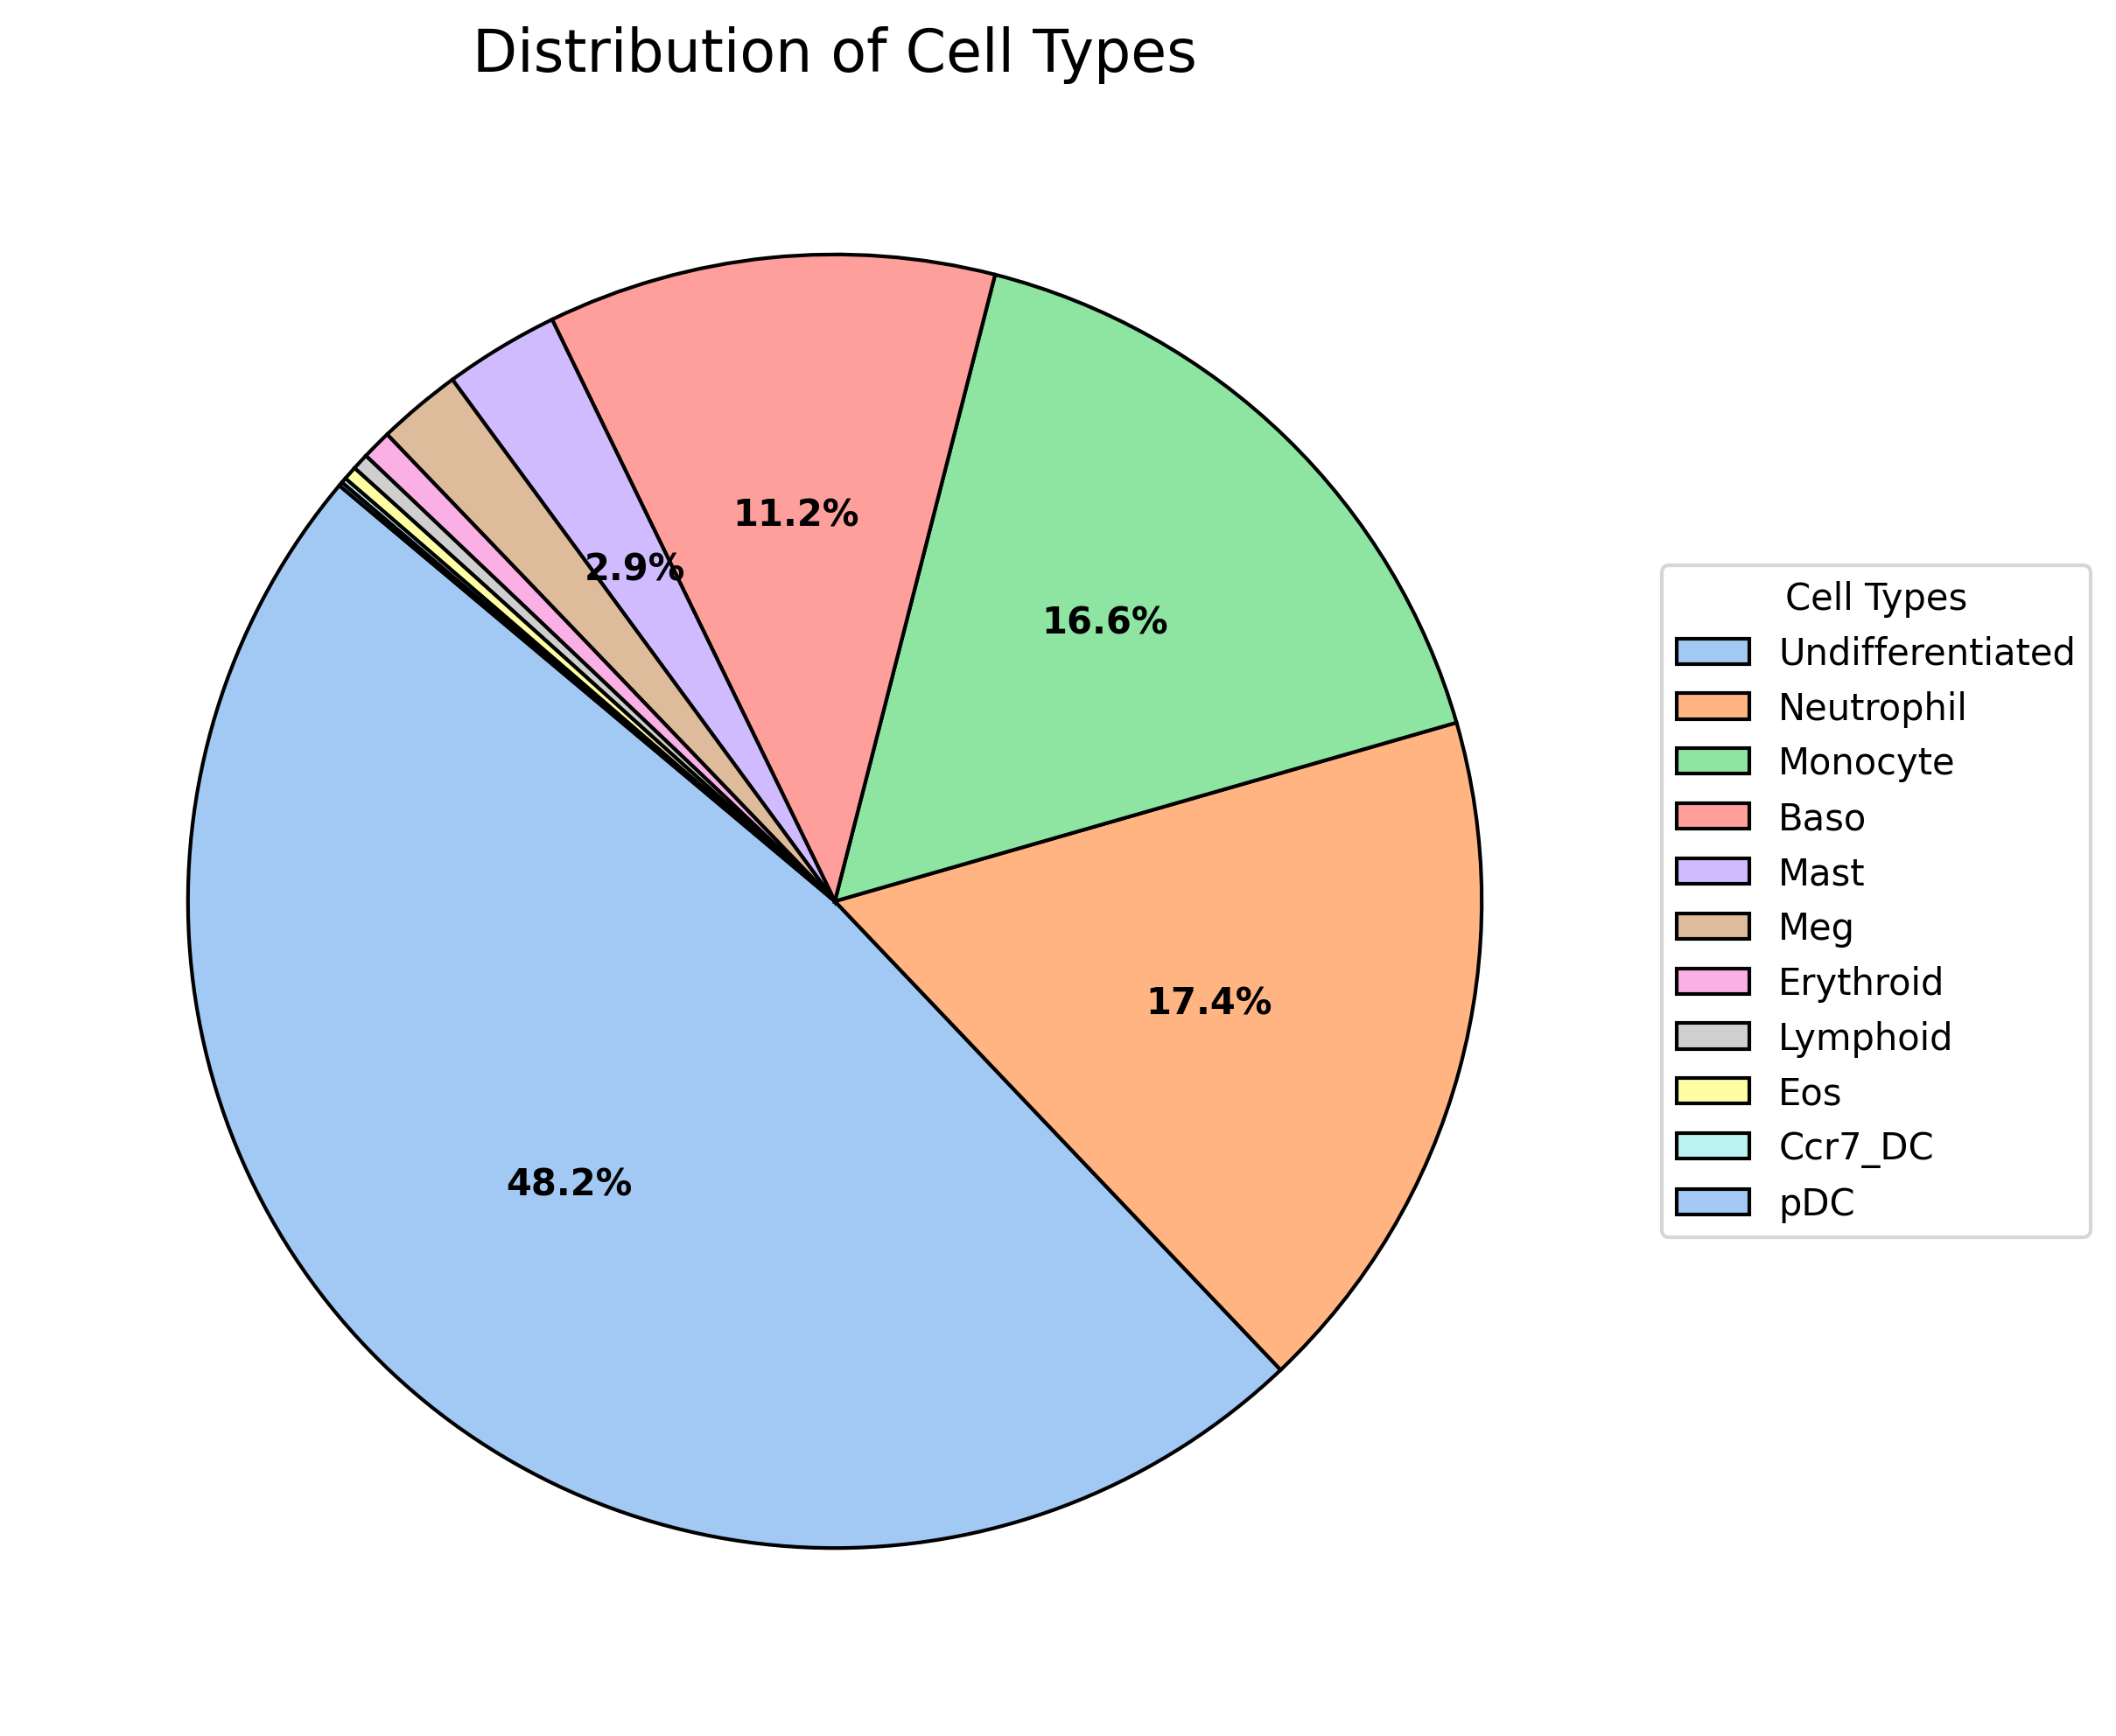

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to only show percentages above a certain threshold
def autopct_threshold(pct, threshold=2.1):
    return ('%1.1f%%' % pct) if pct >= threshold else ''

# Get the value counts
state_info = adata_raw.obs['state_info'].value_counts()

# Set up the figure with higher DPI and better quality
plt.figure(figsize=(8, 8), dpi=300)

# Use Seaborn color palette
colors = sns.color_palette("pastel", len(state_info))

# Plot the pie chart with the custom autopct function
wedges, texts, autotexts = plt.pie(state_info, labels=None, autopct=lambda pct: autopct_threshold(pct), startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a legend outside the pie chart
plt.legend(wedges, state_info.index, title="Cell Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Cell Types', fontsize=16)

# Adjust font size for better readability
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)

# Save the figure
# plt.savefig("DistributionofCellTypes.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [19]:
adata_hvgene = ad.read_h5ad("/Users/apple/Desktop/KB/data/LarryData/Larry_41093_2000_norm_log.h5ad")

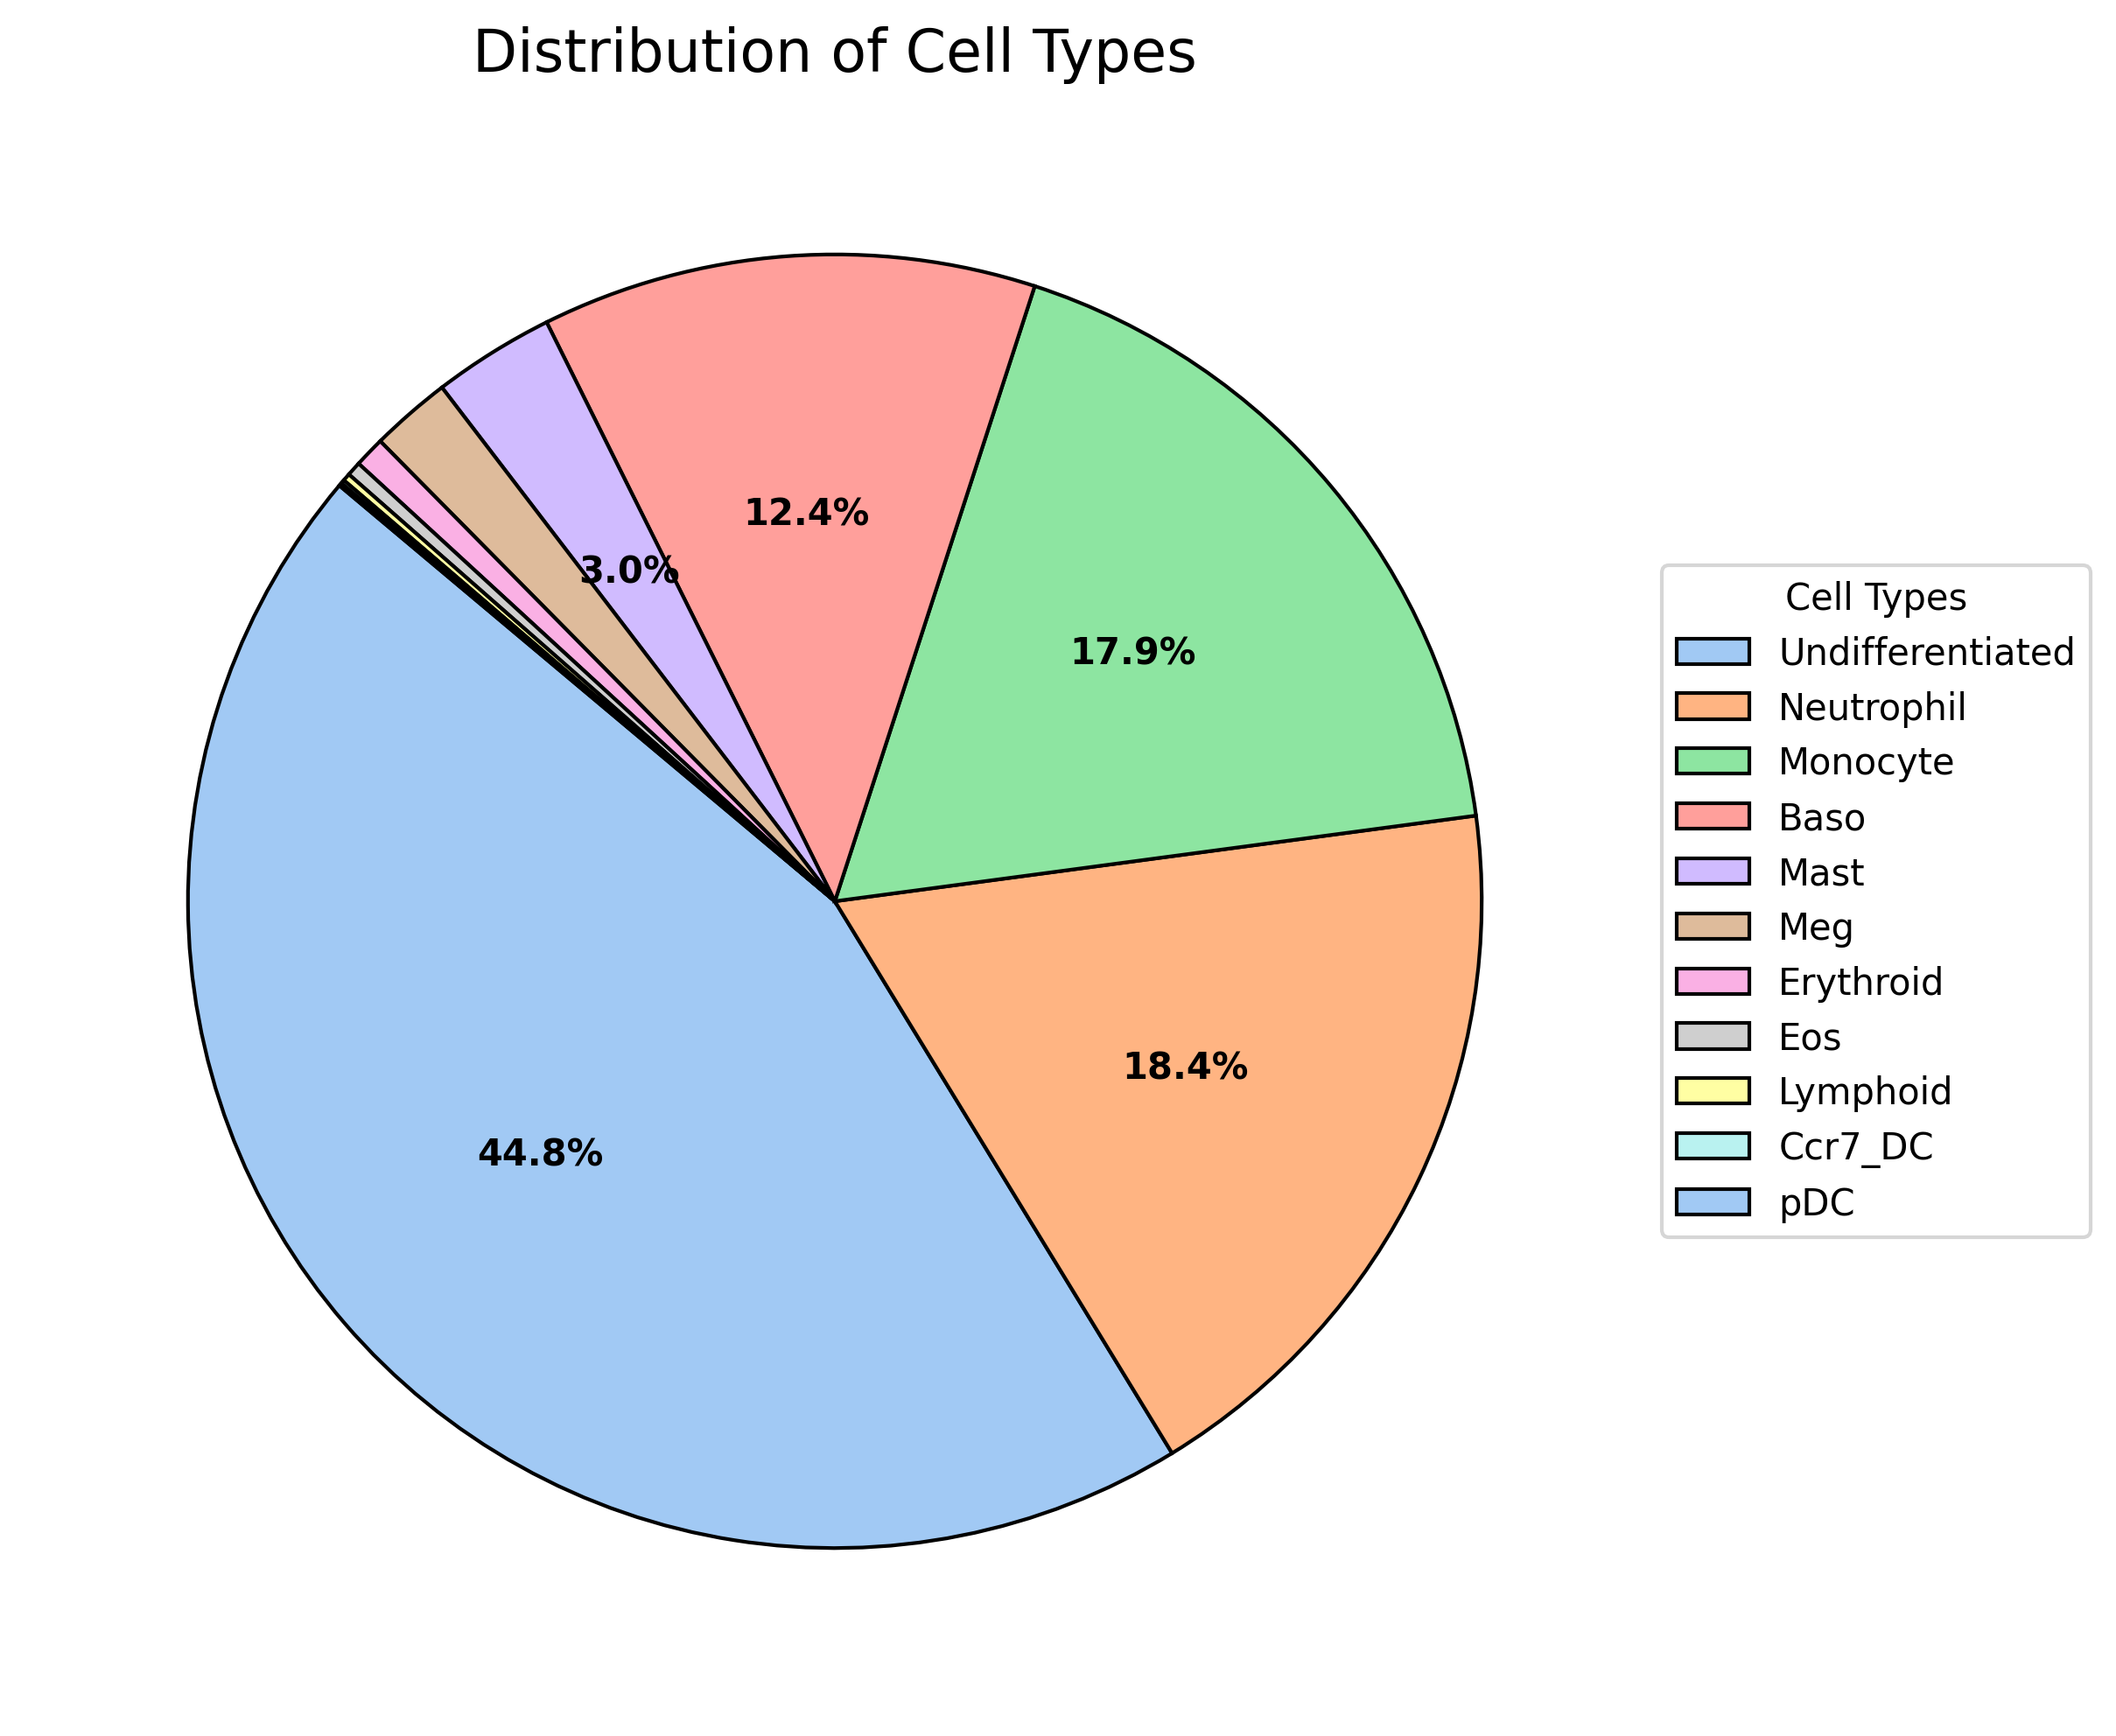

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to only show percentages above a certain threshold
def autopct_threshold(pct, threshold=2.1):
    return ('%1.1f%%' % pct) if pct >= threshold else ''

# Get the value counts
state_info = adata_hvgene.obs['state_info'].value_counts()

# Set up the figure with higher DPI and better quality
plt.figure(figsize=(8, 8), dpi=300)

# Use Seaborn color palette
colors = sns.color_palette("pastel", len(state_info))

# Plot the pie chart with the custom autopct function
wedges, texts, autotexts = plt.pie(state_info, labels=None, autopct=lambda pct: autopct_threshold(pct), startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a legend outside the pie chart
plt.legend(wedges, state_info.index, title="Cell Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Cell Types', fontsize=16)

# Adjust font size for better readability
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)

# Save the figure
plt.savefig("DistributionofCellTypes.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
clone_for_remove = frequency_dict[2]+frequency_dict[3]+frequency_dict[4] 
adata_subset = adata_raw[~adata_raw.obs['clone_id'].isin(clone_for_remove)]

In [ ]:
adata_subset.shape

In [ ]:
sc.pp.filter_cells(adata_subset, min_genes=200)
sc.pp.filter_genes(adata_subset, min_cells=3)

In [ ]:
adata_subset.shape

In [ ]:
sc.pp.normalize_total(adata_subset, target_sum=1e4)

In [ ]:
sc.pp.log1p(adata_subset)

In [ ]:
sc.pp.highly_variable_genes(adata_subset,n_top_genes=2000)

In [ ]:
adata_subset.shape

In [ ]:
hvgene = (adata_subset.var.highly_variable[adata_subset.var.highly_variable==True]).index
print("number of the highly variable genes:", len(hvgene))


In [ ]:
adata_hvgene = adata_subset[:,hvgene]

In [ ]:
adata_hvgene.obs['clone_id'].value_counts()

In [ ]:
val_counts = adata_hvgene.obs['clone_id'].value_counts()
freq_dict = {}
for value, count in val_counts.items():
    if count in freq_dict:
        freq_dict[count].append(value)
    else:
        freq_dict[count] = [value]


In [ ]:
clone_remove = freq_dict[4] 
adata_hvgene = adata_hvgene[~adata_hvgene.obs['clone_id'].isin(clone_remove)]
adata_hvgene.obs['clone_id'].value_counts()

In [ ]:
adata_hvgene.shape

In [ ]:
adata_hvgene.write("Larry_41093_2000_norm_log.h5ad")